**TP, TN, FP, FN的定义**

在二分类问题中。

|Real=1	| Real=0 |
| --- | --- |
|Predict=1 | TP |
|Predict=0 | FN |

* TP: 预测为1(Positive)，实际也为1(Truth-预测对了)
* TN: 预测为0(Negative)，实际也为0(Truth-预测对了)
* FP: 预测为1(Positive)，实际为0(False-预测错了)
* FN: 预测为0(Negative)，实际为1(False-预测错了)

总的样本个数为：TP+TN+FP+FN。

**Accuracy/Precision/Recall的定义**

> Accuracy = (预测正确的样本数)/(总样本数)=(TP+TN)/(TP+TN+FP+FN)

> Precision = (预测为1且正确预测的样本数)/(所有预测为1的样本数) = TP/(TP+FP)

> Recall = (预测为1且正确预测的样本数)/(所有真实情况为1的样本数) = TP/(TP+FN)



---

## 1. 归一化 / 正则化

机器学习常用的算法里面，那些需要归一化，那些不需要，通过scikit-learn中的预处理的一些方法，实际了解如何正则化和归一化数据。

先看一下归一化是什么意思，对于一个机器学习任务来说，首先要有数据，数据怎么来？一种情况是别人整理好给你，一种是自己造数据，根据不同的业务场景，自己提取想要的数据，一般来自各个维度的数据，也就是常说的统计口径不一样，造成的结果是得到的数据大小范围变换非常大，并且可能数据类型也不一样，**<font color='red'>统计学里面把数据分为数值型数据、分类型数据、顺序型数据，对这些数据怎么处理成统一的口径的问题，就是机器学习中数据归一化问题</font>**。

**<font color='red'>机器学习任务一般分为3种，也可以是两种，分类、回归和聚类，其中聚类也可以看做是分类</font>**。如果需要预测的值是离散型数据，就是分类任务，如果预测值是连续型数据，就是回归任务。**<font color='red'>常用的回归模型，也几乎都可以做分类，只需要把输出变为分类的类别数的概率值即可</font>**。

常用的机器学习模型有广义线性模型，集成模型，线性判别分析、支持向量机、K近邻、朴素贝叶斯、决策树、感知机、神经网络等。其中广义线性模型包括线性回归、岭回归、Lasso回归、最小角回归、逻辑回归、贝叶斯回归、多项式回归、Elastic Net等。集成的方法包括随机森林、AdaBoost、梯度树提升等。

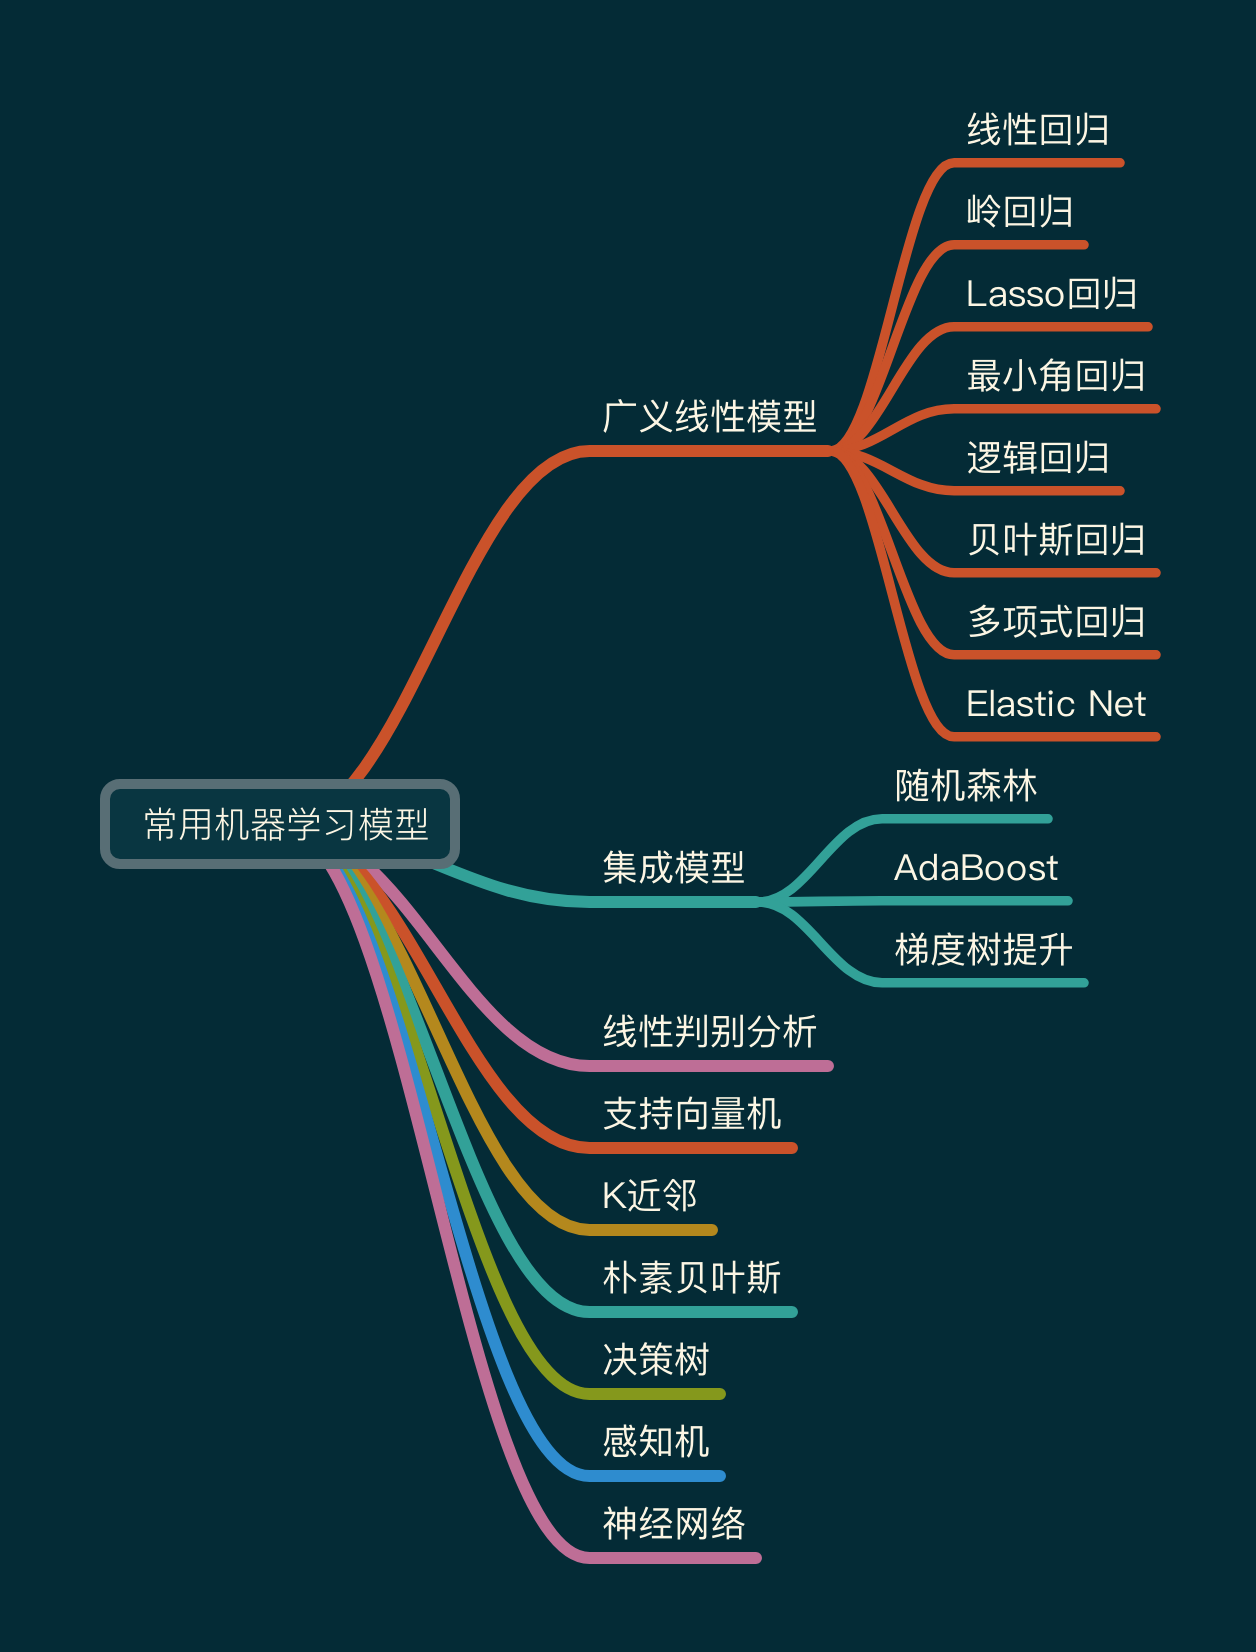

机器学习中的模型这么多，怎么分的清那个需要归一化，那个不需要呢，**<font color='red'>这里有一个一般的准则，就是需要归一化的模型，说明该模型关心变量的值，而相对于概率模型来说，关心的是变量的分布和变量之间的条件概率。所以大部分概率模型不需要归一化。还有就是如果模型使用梯度下降法求最优解时，归一化往往非常有必要，否则很难收敛甚至不能收敛</font>**。 

然后说一下常用的归一化的方法，利用scikit-learn这个工具，把里面提到的归一化方法挨个过一遍。

---

### 1.1 均值，1标准差归一化，也叫z-score标准化

顾名思义，就是把数据的均值变到 0，方差变到 1，公式为：

$$z = \frac{x - \mu}{\sigma}$$

其中 $x$ 是原始数据，$z$ 是变化后的数据，$\mu$ 是均值，$\sigma$ 是方差。一般一个机器学习的数据集都是 `M * N` 的一个大的矩阵，M 代表样本数，N 代表特征的个数，**<font color='red'>其中的均值和方差，指的是整个大的矩阵的均值和方差</font>**，x 是任意一个样本，$x_{ij}$，即：

$$x_{ij}, i = 0,1,...,M,  j = 0,1,...,N$$

下同，不在说明。

然后用scikit-learn来实现 z-score 标准化的方法是下面这个：

这里把需要的方法都 import 进来了，后面不再提示。

In [15]:
import numpy as np
from sklearn import preprocessing
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import FunctionTransformer

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print("X shape:{},y shape:{}".format(X_train.shape, y_train.shape))

X_scaled = preprocessing.scale(X_train, axis=0, with_mean=True, with_std=True, copy=True)
m = X_scaled.mean(axis=0)
s = X_scaled.std(axis=0)
print("Mean:{}, \n Std:{}".format(m, s))

X shape:(331, 10),y shape:(331,)
Mean:[ -4.46101699e-17   2.42840323e-16   2.01248887e-18  -2.12988405e-17
  -2.34790368e-17  -2.49884034e-17  -1.25780554e-17  -5.16538809e-17
  -1.34165924e-17   1.67707406e-17], 
 Std:[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


或者

In [16]:
# 另一种方法
scaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True).fit(X_train)
X_scaled = scaler.transform(X_train)
m = X_scaled.mean(axis=0)
s = X_scaled.std(axis=0)
print("Mean:{}, \n Std:{}".format(m, s))

Mean:[ -4.46101699e-17   2.42840323e-16   2.01248887e-18  -2.12988405e-17
  -2.34790368e-17  -2.49884034e-17  -1.25780554e-17  -5.16538809e-17
  -1.34165924e-17   1.67707406e-17], 
 Std:[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


---

### 1.2 最大 - 最小 归一化

就是把数据变到[0,1]区间内，公式为：

$$x^\ast = \frac{x - min}{max -min}$$

In [17]:
# 最大最小归一化,归一化到[0,1]之间
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)

ma = X_train_minmax.max(axis=0)
mi = X_train_minmax.min(axis=0)
print("max:{},\n min:{}".format(ma, mi))

max:[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.],
 min:[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


还有一种是把数据归一到[-1,1]之间，公式为：

$$x^\ast = \frac{x - \mu}{max - min}$$

In [18]:
# 最大最小归一化,归一化到[-1,1]之间
max_abs_scaler = preprocessing.MaxAbsScaler()
x_maxabs = max_abs_scaler.fit_transform(X_train)

ma = x_maxabs.max(axis=0)
mi = x_maxabs.min(axis=0)
print("max:{},\n min:{}".format(ma, mi))

max:[ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          0.98435481],
 min:[-0.96838121 -0.88085106 -0.52930243 -0.85122699 -0.70749565 -0.58158979
 -0.5646737  -0.41242062 -0.94384991 -1.        ]


---

### 1.3 正则化

正则化方法包括 $L1$，$L2$，$max$ 正则三种方法，在数学里也叫 $L1$ 范数，$L2$ 范数，**<font color='red'>简单理解就是取绝对值和绝对值的平方在开方得到的结果</font>**。看代码

In [19]:
X_normalized = preprocessing.normalize(X, norm='l2', axis=1, copy=True, return_norm=False)  
# l2, l1, max

print("{},\n {}".format(X[0], X_normalized[0]))

[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613],
 [ 0.32100597  0.42726811  0.52014127  0.18439893 -0.37283438 -0.29356288
 -0.36589885 -0.02185454  0.16784162 -0.14876892]


In [20]:
# 另一种方法
normalizer = preprocessing.Normalizer(norm='l2', copy=True).fit(X)
X_normalized = normalizer.transform(X)

print("{},\n {}".format(X[0], X_normalized[0]))

[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613],
 [ 0.32100597  0.42726811  0.52014127  0.18439893 -0.37283438 -0.29356288
 -0.36589885 -0.02185454  0.16784162 -0.14876892]


---

### 1.4 变换数据的分布

**<font color='red'>将原始数据变换成均匀分布，这样会改变原始数据的分布和变量间的相关性。其实这个和下面的多项式变换不属于归一化处理，只是一种数据变换的方式。</font>**

In [22]:
quantile_transformer = preprocessing.QuantileTransformer(random_state=0)
X_train_trans = quantile_transformer.fit_transform(X_train)

percentile = np.percentile(a=X_train[:, 0], q=[0, 25, 50, 75, 100], axis=None, out=None,
                           overwrite_input=False, interpolation='linear', keepdims=False)

print(percentile)

[-0.10722563 -0.0382074   0.00538306  0.03807591  0.11072668]


---

### 1.5 多项式变换

4 个特征的度为 2 的多项式转换公式为：

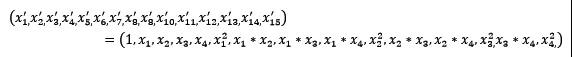

然后比如数据为（1,4）大小的数组，[[1,2,3,4]]

In [26]:
# 多项式转换
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
X = np.array([[1, 2, 3, 4]])
polyed = poly.fit_transform(X)
print(polyed)

print ""

print("{},{}, {}".format(polyed.shape, np.max(polyed), np.min(polyed)))

[[  1.   1.   2.   3.   4.   1.   2.   3.   4.   4.   6.   8.   9.  12.
   16.]]

(1, 15),16.0, 1.0


---

### 1.6 自定义函数转换

就是你可以用任意你定义的函数，把数据变换到另一个值，看代码：

In [30]:
# 自定义函数转换
transformer = FunctionTransformer(func=np.log1p, inverse_func=None, validate=True,
                                  accept_sparse=False, pass_y='deprecated',
                                  kw_args=None, inv_kw_args=None)

transformered = transformer.transform(X)

print("{},\n {}".format(X[0], transformered[0]))
print(np.log1p(0.03807591))

[1 2 3 4],
 [ 0.69314718  1.09861229  1.38629436  1.60943791]
0.0373689130909


下面对几个常用的模型做个分类，**<font color='red'>需要说明的是，通常归一化之后，效果会变好</font>**，但是到底归一不归一，没有一个确定的说法，还是要用结果说话，所以经常有人在微信群里问，某某某个模型要不要归一化，其实你去试试不就知道了，归一化做一遍，不归一化做一遍，做个比较就知道需不需要归一化了。

**需要归一化的模型有：**

* 神经网络，标准差归一化
* 支持向量机，标准差归一化
* 线性回归，可以用梯度下降法求解，需要标准差归一化
* PCA
* LDA
* 聚类算法基本都需要
* K近邻，线性归一化，归一到[0,1]区间内。 
* 逻辑回归

**不需要归一化的模型：**

* 决策树：  每次筛选都只考虑一个变量，不考虑变量之间的相关性，所以不需要归一化。
* 随机森林：不需要归一化，mtry为变量个数的均方根。
* 朴素贝叶斯

**需要正则化的模型：**

* Lasso
* Elastic Net

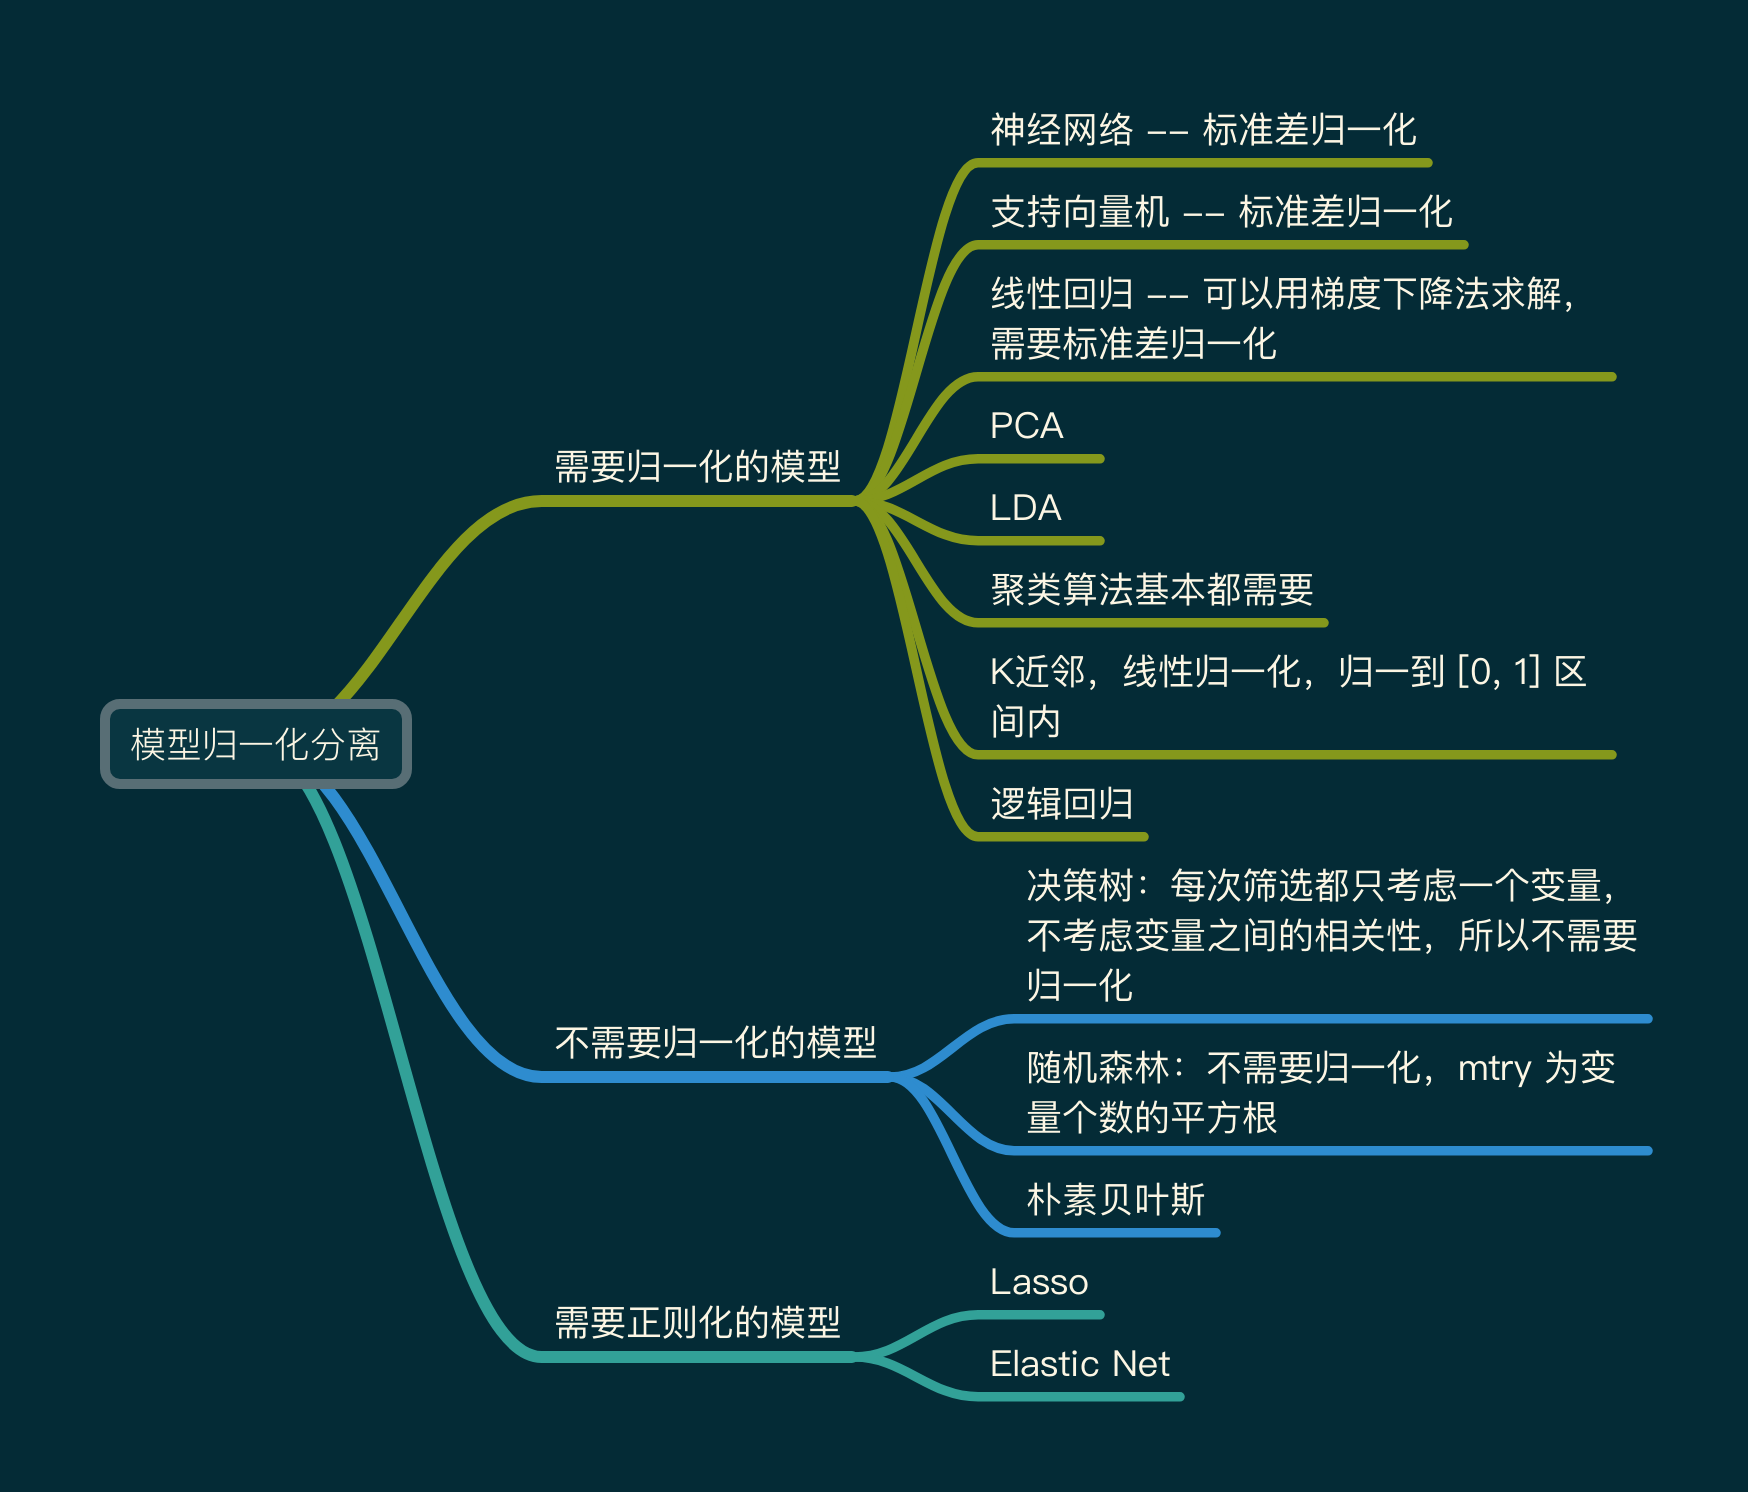

## Reference

[8种常见机器学习算法比较 - 偏差方差总结不错的连接](https://juejin.im/entry/58f482470ce463006bbaff8d)

[机器学习算法汇总及选择](https://zhuanlan.zhihu.com/p/31711537)

[如何选择机器学习算法](https://docs.microsoft.com/zh-cn/azure/machine-learning/studio/algorithm-choice)

[在实际项目中，如何选择合适的机器学习模型？](http://gitbook.cn/books/5a37ef87b41c8814671a20e6/index.html)

[机器学习”小憩“——总结应用场景](https://www.cnblogs.com/nolonely/p/6678256.html)

[30分钟学会用scikit-learn的基本分类方法（决策树、SVM、KNN）和集成方法（随机森林，Adaboost和GBRT）](http://blog.csdn.net/u010900574/article/details/52669072)

[30分钟学会用scikit-learn的基本回归方法（线性、决策树、SVM、KNN）和集成方法（随机森林，Adaboost和GBRT）](http://blog.csdn.net/u010900574/article/details/52666291)

[机器学习实战](http://ml.apachecn.org/mlia/ensemble-random-tree-adaboost/)

[随机森林的优缺点](http://blog.csdn.net/keepreder/article/details/47273297)

[随机之美——机器学习中的随机森林模型](http://www.afenxi.com/post/13421)

[优达（Udacity）finding_donors](http://blog.csdn.net/grape875499765/article/details/78773781)

[kNN算法的优缺点](http://blog.csdn.net/ch1209498273/article/details/78440276)

[各种机器学习的应用场景分别是什么？例如，k近邻,贝叶斯，决策树，svm，逻辑斯蒂回归和最大熵模型。](https://www.zhihu.com/question/26726794)

[各常用分类算法的优缺点总结:DT/ANN/KNN/SVM/GA/Bayes/Adaboosting/Rocchio](http://blog.csdn.net/u014563989/article/details/43797977)

[机器学习算法优缺点及其应用领域](http://blog.csdn.net/mach_learn/article/details/39501849)

[]()

[]()

[]()